In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df=pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df=df[[5,0]]
df.columns=['tweets','sentiments']
df.head()

,tweets,sentiments
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [6]:
df['sentiments'].value_counts()

4    800000
0    800000
Name: sentiments, dtype: int64

In [7]:
sent_map={0:'negative',4:'positive'}

**feature extraction**

# Word Count

In [8]:
df['word_counts']=df['tweets'].apply(lambda x:len(str(x).split()))

In [9]:
df.head()

,tweets,sentiments,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# character counts

In [10]:
df['char_counts']=df['tweets'].apply(lambda x:len(x))

In [11]:
df.head()

,tweets,sentiments,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


#average word length

In [12]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len+=len(word)
    return word_len/len(words)

In [13]:
df['avg_word_len']=df['tweets'].apply(lambda x:get_avg_word_len(x))

In [14]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


#stop word count

In [15]:
def get_stop_word_count(x):
    words=x.split()
    count=0
    for word in words:
        if word in STOP_WORDS:
            count+=1
    return count

In [16]:
df['stop_word_count']=df['tweets'].apply(lambda x:get_stop_word_count(x))

In [17]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


# #hashtag and @mentions

In [18]:
df['hashtag_count']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))
df['mention_count']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [19]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


# digit count and upper case count

In [20]:
df['digit_count']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
df['upper_count']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(t)>3]))


In [21]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,0


In [22]:
df.loc[45]['tweets']

"@Viennah Yay! I'm happy for you with your job! But that also means less time for me and you... "

# preprocessing and cleaning

lower case

In [23]:
df['tweets']=df['tweets'].apply(lambda x:x.lower())

## contraction to expansion

In [24]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [25]:
def cont_to_exp(x):
    if type(x)==str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
    return x

In [26]:
df['tweets']=df['tweets'].apply(lambda x:cont_to_exp(x))

In [27]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,0


# count and remove emails using regular expression

In [28]:
import re

In [29]:
x='hi mail is abc@gmail.com and second is xyz@gmail.com'

In [30]:
re.findall(r'([A-Za-z0-9._-]+@[A-Za-z0-9._-]+\.[A-Za-z0-9_-]+)',x)

['abc@gmail.com', 'xyz@gmail.com']

In [31]:
def get_email_count(x):
    return len(re.findall(r'([A-Za-z0-9._-]+@[A-Za-z0-9._-]+\.[A-Za-z0-9_-]+)',x))

In [32]:
df['email_count']=df['tweets'].apply(lambda x:get_email_count(x))

In [33]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,0,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,0,0


In [34]:
df[df['email_count']>0]

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,1,1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,0,1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,0,1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,1


In [35]:
df['tweets']=df['tweets'].apply(lambda x:re.sub(r'([A-Za-z0-9._-]+@[A-Za-z0-9._-]+\.[A-Za-z0-9_-]+)','',x))

# remove urls

In [36]:
x='url is https://abc.com/xyz thank you'

In [37]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('https', 'abc.com', '/xyz')]

In [38]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)

'url is  thank you'

In [39]:
df['tweets']=df['tweets'].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

# remove RT retweet

In [40]:
df['tweets']=df['tweets'].apply(lambda x:re.sub('RT',"",x))

In [41]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
0,"@switchfoot - awww, that has / that is a bumm...",0,19,115,5.052632,4,0,1,0,0,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,0,0


# remove special characters and punctuations

In [42]:
df['tweets']=df['tweets'].apply(lambda x:re.sub('[^A-Z a-z 0-9-]+','',x))

In [43]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
0,switchfoot - awww that has that is a bummer ...,0,19,115,5.052632,4,0,1,0,0,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,nationwideclass no it has it is not behaving ...,0,21,111,4.285714,10,0,1,0,0,0


In [44]:
df.loc[35]['tweets']

'ok I am sick and spent an hour sitting in the shower cause i was too sick to stand and held back the puke like a champ bed now '

# remove multiple spaces

In [45]:
x='hello   xyz   '

In [46]:
x=" ".join(x.split())

In [47]:
df['tweets']=df['tweets'].apply(lambda x:" ".join(x.split()))

# remove HTML tags

In [48]:
from bs4 import BeautifulSoup

In [49]:
x='<html><h1>hello world<h1>'

In [50]:
BeautifulSoup(x,'lxml').get_text()

'hello world'

In [51]:
#df['tweets']=df['tweets'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

In [52]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
0,switchfoot - awww that has that is a bummer yo...,0,19,115,5.052632,4,0,1,0,0,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,nationwideclass no it has it is not behaving a...,0,21,111,4.285714,10,0,1,0,0,0


# remove accented characters

In [53]:
import unicodedata

In [54]:
x='noção hello noção'

In [55]:
def remove_accented_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('ascii','ignore')
    return x

In [56]:
remove_accented_chars(x)

'nocao hello nocao'

In [57]:
df['tweets']=df['tweets'].apply(lambda x:remove_accented_chars(x))

# using spacy 

In [58]:
import spacy

# remove stop words

In [59]:
x='this is stop word'

In [60]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop word'

In [61]:
df['tweets']=df['tweets'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS]))

# remove common and rare words

In [62]:
text=" ".join(df['tweets'])
text=text.split()
freq=pd.Series(text).value_counts()
f20=freq[:20]
r20=freq[-20:]

In [63]:
f20

I        214182
good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
dtype: int64

In [64]:
r20

nomadthewolf      1
class-trip        1
vadodara          1
kelseydd          1
betterfeeling     1
mmmsummer         1
offstage          1
leilanigirl13     1
beiai             1
distancingquot    1
smithwaites       1
hipstifle         1
alexrapoport      1
fireworksquot     1
re-share          1
betai             1
cccp2040          1
snowmore          1
smilinluv         1
1301              1
dtype: int64

In [65]:
df['tweets']=df['tweets'].apply(lambda x:" ".join([t for t in x.split() if t not in f20]))

In [66]:
df['tweets']=df['tweets'].apply(lambda x:" ".join([t for t in x.split() if t not in r20]))

In [67]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,0,0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,0,0


# word cloud visualization

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
x=" ".join(text[:20000])
wc=WordCloud(width=800,height=400).generate(x)

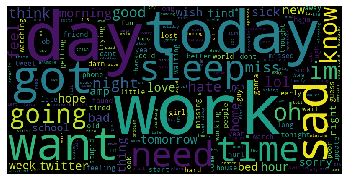

In [70]:
plt.imshow(wc)
plt.axis('off')
plt.show()

# spelling correction

In [71]:
from textblob import TextBlob

In [ ]:
x='helo wold'

In [ ]:
x=TextBlob(x).correct()
x

# tokenization

In [ ]:
x='this is am this very is'
TextBlob(x).words

# lemmatization (converting to base form)

In [ ]:
from textblob import Word
x='run running ran runs'
for word in x.split():
    print(Word(word).lemmatize())

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp(x)
for token in doc:
    print(token.lemma_)

# detecting entities using NER of spacy

In [ ]:
x='shubham nemani lives in india'
doc=nlp(x)
for ent in doc.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

In [ ]:
from spacy import displacy
displacy.render(doc,style='ent')


# detecting noun

In [ ]:
for noun in doc.noun_chunks:
    print(noun)

# language detection and translation

In [ ]:
x="My name is Shubham Nemani"
tb=TextBlob(x)
tb.detect_language()

In [ ]:
tb.translate(to='hi')

# using inbuilt classifier

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x='I love you'
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())
tb.sentiment

In [ ]:
x='I hate you'
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())
tb.sentiment

## ngram

In [ ]:
x='i love you'
tb=TextBlob(x)
tb.ngrams(2)

# BoW bag of words - making dictionary with count of each word

In [ ]:
x=['this is saket','this is ayush','this is saket jain ']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(ngram_range=(2,2))
text_counts=cv.fit_transform(x)

In [ ]:
cv.get_feature_names()

In [ ]:
text_counts.toarray()

In [ ]:
bow =pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [ ]:
bow

# term frequency or normalized freq of each word

In [ ]:
term_freq=bow.copy()

In [ ]:
for i in range(term_freq.shape[0]):
    term_freq.loc[i]=term_freq.loc[i]/sum(term_freq.loc[i])

In [ ]:
term_freq

# word embeddings

converting word to vector using Word2Vec

In [72]:
nlp=spacy.load('en_core_web_lg')

In [ ]:
x='hello world I am shubham dog cat Ayush'
doc=nlp(x)


In [ ]:
for token in doc:
    print(token.text,token.has_vector)

In [ ]:
token.vector.shape

In [ ]:
x='one two three dog cat lion'
doc=nlp(x)

In [ ]:
for token1 in doc:
    for token2 in doc:
        print(token1.text,token2.text,token1.similarity(token2))
    print()

# Models

## using BoW

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df0=df[df['sentiments']==0].sample(3000)
df4=df[df['sentiments']==4].sample(3000)

In [ ]:
df_red=df0.append(df4)

In [ ]:
df_red.shape

In [ ]:
df_red.head()

In [ ]:
df_red_feat=df_red.drop(labels=['tweets','sentiments'],axis=1)
df_red_feat.head()

In [ ]:
df_red_y=df_red['sentiments']
df_red_y.head()

## feature extraction of BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
text_counts=cv.fit_transform(df_red['tweets'])

In [ ]:
text_counts.toarray().shape

text counts is our X input

In [ ]:
df_red_bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [ ]:
df_red_bow.head()

In [73]:
from sklearn.linear_model import SGDClassifier , LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [74]:
sgd=SGDClassifier(n_jobs=-1,random_state=2,max_iter=200)
lr=LogisticRegression(random_state=2,max_iter=200)
lrcv=LogisticRegressionCV(cv=2,random_state=2,max_iter=1000)
svm=LinearSVC(random_state=2,max_iter=200)
rfc=RandomForestClassifier(n_jobs=-1,random_state=2,n_estimators=200)

In [75]:
clf={'SGD':sgd ,'LR':lr , 'LRCV':lrcv,'SVM':svm,'RFC':rfc}
clf.keys()

dict_keys(['SGD', 'LR', 'LRCV', 'SVM', 'RFC'])

In [76]:
def classify(X,y):
    scaler=MinMaxScaler(feature_range=(0,1))
    X=scaler.fit_transform(X)
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
    
    for key in clf.keys():
        model=clf[key]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        print(key,"---->",acc)

In [ ]:
%%time
classify(df_red_bow,df_red_y)

## with manual features

In [ ]:
%%time
classify(df_red_feat,df_red_y)

# with word embeddings

In [77]:
def get_vector(x):
    doc=nlp(x)
    return doc.vector.reshape(1,-1)

In [78]:
%%time
df_red['vector']=df_red['tweets'].apply(lambda x:get_vector(x))

NameError: name 'df_red' is not defined

In [79]:
X=np.concatenate(df_red['vector'].to_numpy(),axis=0)

NameError: name 'df_red' is not defined

In [ ]:
X.shape

In [ ]:
classify(pd.DataFrame(X),df_red_y)

# using whole dataset

In [80]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_len,stop_word_count,hashtag_count,mention_count,digit_count,upper_count,email_count
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,0,0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,0,0


In [81]:
df.shape

(1600000, 11)

In [86]:
dfr=df.sample(50000)

In [87]:
%%time
dfr['vector']=dfr['tweets'].apply(lambda x:get_vector(x))

CPU times: user 6min 57s, sys: 859 ms, total: 6min 58s
Wall time: 7min 1s


In [88]:
dfr.shape

(50000, 12)

In [110]:
X=np.concatenate(dfr['vector'].to_numpy(),axis=0)
y=(dfr['sentiments']>1).astype(int)

In [111]:
y.head()

1490627    1
1352611    1
47141      0
36303      0
267380     0
Name: sentiments, dtype: int64

In [90]:
%%time
classify(pd.DataFrame(X),y)

SGD ----> 0.7099


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR ----> 0.7248
LRCV ----> 0.7238


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM ----> 0.6901
RFC ----> 0.7021
CPU times: user 4min 35s, sys: 1.07 s, total: 4min 36s
Wall time: 2min 36s


# using neural network

In [131]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LSTM
from tensorflow.keras.models import Sequential

In [136]:
model=Sequential([
    Dense(128,activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(64,activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(2,activation='sigmoid')
])

In [112]:
import tensorflow as tf
y_oh=tf.keras.utils.to_categorical(y,num_classes=2)

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y_oh,random_state=2,test_size=0.2)

In [138]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=[X_test,y_test])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 149us/sample - loss: 0.5099 - accuracy: 0.7459 - val_loss: 0.5361 - val_accuracy: 0.7321
Epoch 2/10
40000/40000 [==============================] - 5s 133us/sample - loss: 0.5009 - accuracy: 0.7519 - val_loss: 0.5383 - val_accuracy: 0.7325
Epoch 3/10
40000/40000 [==============================] - 5s 128us/sample - loss: 0.4950 - accuracy: 0.7571 - val_loss: 0.5455 - val_accuracy: 0.7242
Epoch 4/10
40000/40000 [==============================] - 5s 135us/sample - loss: 0.4901 - accuracy: 0.7604 - val_loss: 0.5444 - val_accuracy: 0.7294
Epoch 5/10
40000/40000 [==============================] - 5s 134us/sample - loss: 0.4848 - accuracy: 0.7647 - val_loss: 0.5470 - val_accuracy: 0.7296
Epoch 6/10
40000/40000 [==============================] - 5s 132us/sample - loss: 0.4812 - accuracy: 0.7652 - val_loss: 0.5496 - val_accuracy: 0.7315
Epoch 7/10
40000/40000 [==========================

In [150]:
y_test=np.array(y_test)
y_test.reshape(10000,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [156]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred
cm=confusion_matrix(y_test,y_pred)
cm

array([1, 1, 0, ..., 1, 0, 1])